In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-mri-images-for-brain-tumor-detection


Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Classes: ['no', 'yes']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,593 (9.24 MB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 2,258,240 (8.61 MB)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5005 - loss: 0.8355 - val_accuracy: 0.6400 - val_loss: 0.5954 - learning_rate: 1.0000e-04
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 894ms/step - accuracy: 0.6630 - loss: 0.6211 - val_accuracy: 0.6400 - val_loss: 0.5692 - learning_rate: 1.0000e-04
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 876ms/step - accuracy: 0.6548 - loss: 0.6288 - val_accuracy: 0.6400 - val_loss: 0.5454 - learning_rate: 1.0000e-04
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 971ms/step - accuracy: 0.6921 - loss: 0.5832 - val_accuracy: 0.6400 - val_loss: 0.5258 - learning_rate: 1.0000e-04
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 894ms/step - accuracy: 0.6935 - loss: 0.5779 - val_accuracy: 0.6600 - val_loss: 0.5160 - learning_rate: 1.0000e-04
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 880ms/step - accuracy: 0.6700 - loss: 0.5645 - val_accuracy: 0.6800 - val_loss: 0.4996 - learning_rate: 1.0000e-04
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 852ms/step - accura

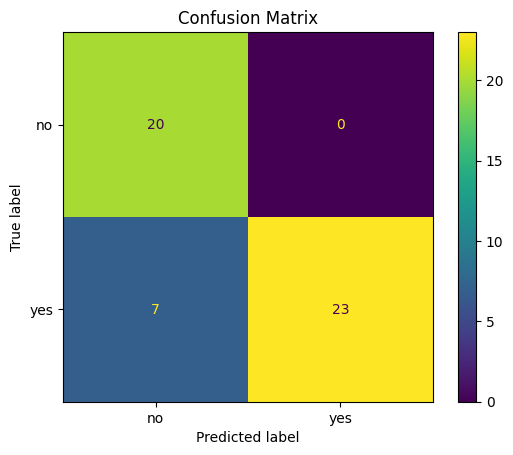

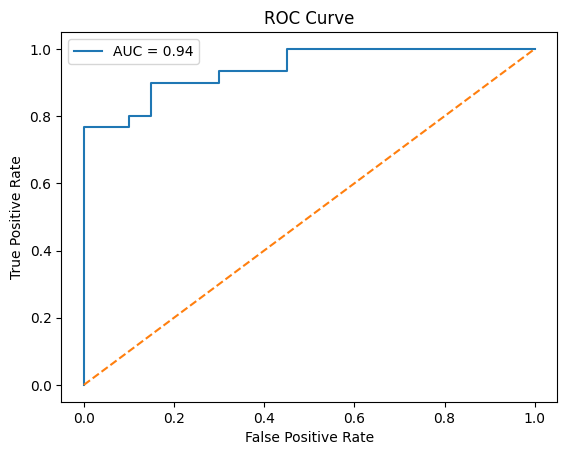

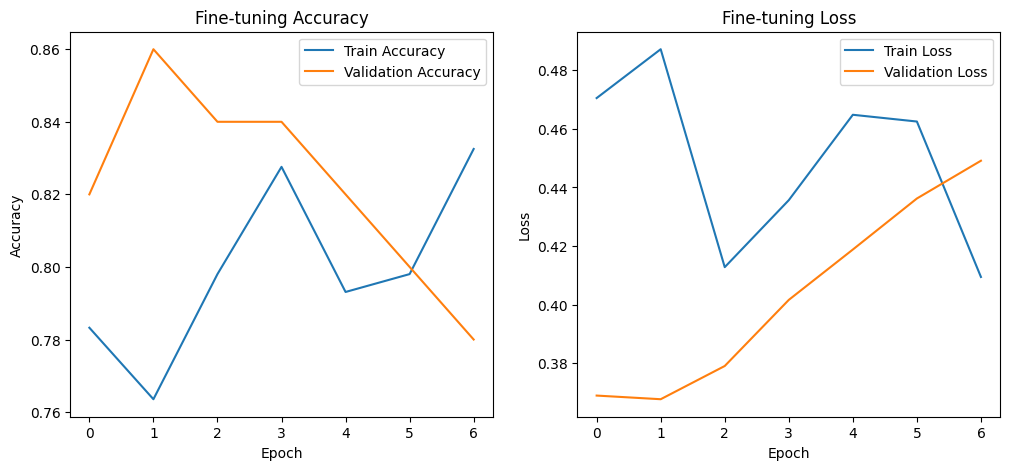

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# --- Settings ---
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16
SEED = 1337
DATA_DIR = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"

# --- Load datasets with train/validation split ---
train_ds = keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

val_ds = keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

class_names = train_ds.class_names
print(f"Classes: {class_names}")

# --- Prefetch for performance ---
AUTOTUNE = tf.data.AUTOTUNE

# Data augmentation pipeline
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.1),
])

def augment(images, labels):
    return data_augmentation(images), labels

train_ds = train_ds.cache().shuffle(1000).map(augment).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# --- Build model ---
base_model = keras.applications.MobileNetV2(
    input_shape=IMAGE_SIZE + (3,),
    include_top=False,
    weights="imagenet",
)
base_model.trainable = False

inputs = keras.Input(shape=IMAGE_SIZE + (3,))
x = keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.summary()

# --- Callbacks ---
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7, verbose=1
)
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
callbacks = [lr_scheduler, early_stopping]

# --- Initial training ---
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks,
)

# --- Fine-tuning ---
base_model.trainable = True

# Freeze all layers except last 20
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=callbacks,
)

# --- Evaluation ---
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Final validation accuracy: {val_accuracy:.2%}")

# --- Predictions for metrics and visualization ---
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_probs = model.predict(val_ds).flatten()
y_pred = (y_probs > 0.5).astype(int)

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=class_names)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Accuracy and Loss plots for fine-tuning
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fine_tune_history.history["accuracy"], label="Train Accuracy")
plt.plot(fine_tune_history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Fine-tuning Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fine_tune_history.history["loss"], label="Train Loss")
plt.plot(fine_tune_history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Fine-tuning Loss")
plt.legend()

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

image_size = (224, 224)
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

# Data loading (adjust paths accordingly)
train_ds = keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-mri-images-for-brain-tumor-detection',
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=123,
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-mri-images-for-brain-tumor-detection',
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False,
    validation_split=0.2,
    subset="validation",
    seed=123,
)

# Data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.1),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Build model
base_model = keras.applications.MobileNetV2(
    input_shape=image_size + (3,),
    include_top=False,
    weights='imagenet',
)
base_model.trainable = False  # Freeze base initially

inputs = keras.Input(shape=image_size + (3,))
x = keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

# Callbacks
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7, verbose=1)
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
callbacks = [lr_scheduler, early_stopping]

# Train classification head
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)

# Fine-tune: unfreeze some layers
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=callbacks
)


Found 506 files belonging to 3 classes.
Using 405 files for training.
Found 506 files belonging to 3 classes.
Using 101 files for validation.
Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.3484 - loss: 0.8329 - val_accuracy: 0.0000e+00 - val_loss: -0.1142 - learning_rate: 1.0000e-04
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.3788 - loss: 0.8268 - val_accuracy: 0.0000e+00 - val_loss: -0.1273 - learning_rate: 1.0000e-04
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3308 - loss: 0.6942 - val_accuracy: 0.0000e+00 - val_loss: -0.1173 - learning_rate: 1.0000e-04
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3086 - loss: 0.7776
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.3084 - loss: 0.7721 - val_accuracy: 0.0000e+00 - val_loss: -0.0910 - learning_rate: 1.0000e-04
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.3278 - los

3 classes to fix accuracy

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks

# Input shape (from your logs): (224, 224, 3)
input_shape = (224, 224, 3)
num_classes = 3  # from your dataset

# Load MobileNetV2 base model without top
base_model = tf.keras.applications.MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # freeze base for transfer learning

# Build your model
inputs = layers.Input(shape=input_shape)
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)  # preprocessing layer
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)  # 3 classes

model = models.Model(inputs, outputs)

# Compile with correct loss for multiclass classification
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',  # assuming integer labels
    metrics=['accuracy']
)

# Optional callbacks for better training
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1
)
early_stop = callbacks.EarlyStopping(
    monitor='val_loss', patience=7, restore_best_weights=True, verbose=1
)

# Print model summary for sanity check
model.summary()

# Then train with your data generators or datasets:
# model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=[reduce_lr, early_stop])


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_2 (TrueDivide)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_2 (Subtract)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,851 (9.24 MB)

 Trainable params: 164,611 (643.01 KB)

 Non-trainable params: 2,258,240 (8.61 MB)

compile with proper loss and optimizer

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


train with callbacks and early stop

In [ ]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
]

history = model.fit(
    train_ds,  # your training dataset or generator
    validation_data=val_ds,  # your validation dataset or generator
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.3602 - loss: 1.7275 - val_accuracy: 0.2277 - val_loss: 1.3358 - learning_rate: 1.0000e-04
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3587 - loss: 1.7181 - val_accuracy: 0.2673 - val_loss: 1.2855 - learning_rate: 1.0000e-04
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4277 - loss: 1.5336 - val_accuracy: 0.2772 - val_loss: 1.3028 - learning_rate: 1.0000e-04
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4141 - loss: 1.4958 - val_accuracy: 0.2673 - val_loss: 1.2992 - learning_rate: 1.0000e-04
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3999 - loss: 1.5617 - val_accuracy: 0.2871 - val_loss: 1.2738 - learning_rate: 1.0000e-04
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4310 - loss: 1.3970 - val_accuracy: 0.3564 - val_loss: 1.2138 - learning_rate: 1.0000e-04
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.4346 - loss:

In [ ]:
# Data Augmentation example with tf.keras.layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Add augmentation layer before base model input:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)

# Load MobileNetV2 base model (without top)
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = True  # unfreeze to fine-tune

# Freeze all but last 30 layers (example)
for layer in base_model.layers[:-30]:
    layer.trainable = False

x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Fit with callbacks as before
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.3512 - loss: 1.6625 - val_accuracy: 0.0000e+00 - val_loss: 2.3667 - learning_rate: 1.0000e-05
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.3345 - loss: 1.7364 - val_accuracy: 0.0000e+00 - val_loss: 2.2995 - learning_rate: 1.0000e-05
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.3245 - loss: 1.7356 - val_accuracy: 0.0000e+00 - val_loss: 2.2808 - learning_rate: 1.0000e-05
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.3524 - loss: 1.6149 - val_accuracy: 0.0000e+00 - val_loss: 2.2446 - learning_rate: 1.0000e-05
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.3123 - loss: 1.7120 - val_accuracy: 0.0099 - val_loss: 2.1794 - learning_rate: 1.0000e-05
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.3714 - loss: 1.5974 - val_accuracy: 0.0099 - val_loss: 2.1437 - learning_rate: 1.0000e-05
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy

In [ ]:
import os
from collections import Counter

train_dir = "/kaggle/input/brain-mri-images-for-brain-tumor-detection"
class_counts = {}

for label in os.listdir(train_dir):
    count = len(os.listdir(os.path.join(train_dir, label)))
    class_counts[label] = count

print(class_counts)


{'no': 98, 'yes': 155, 'brain_tumor_dataset': 2}


In [ ]:
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

data_dir = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"  # not the parent dir!

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(224, 224),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(224, 224),
    batch_size=32
)


Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [ ]:
print(train_ds.class_names)

['no', 'yes']


class weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Define class names and counts
class_names = ['no', 'yes']
class_counts = [98, 155]

# Generate weights
weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=np.array([0]*98 + [1]*155)
)

class_weights = {i : weights[i] for i in range(len(class_names))}
print("Class weights:", class_weights)


Class weights: {0: np.float64(1.2908163265306123), 1: np.float64(0.8161290322580645)}


fixing the dataset

In [ ]:
import os
print(os.listdir("/kaggle/input"))

['brain-mri-images-for-brain-tumor-detection']


In [ ]:
print(os.listdir("/kaggle/input/brain-mri-images-for-brain-tumor-detection"))

['no', 'yes', 'brain_tumor_dataset']


In [ ]:
import os
print(os.listdir("/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"))

['no', 'yes']


In [ ]:
dataset_dir = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [ ]:
class_weights = {0: 1.29, 1: 0.82}


In [ ]:
import tensorflow as tf

# Data Augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Inputs
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)

# Load MobileNetV2 base model without the top classifier layers
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze all layers except the last 30 (fine-tuning)
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Forward pass through base model
x = base_model(x, training=False)

# Global pooling, dropout, dense layers, and output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)  # 2 classes: 'no' and 'yes'

model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Example class weights based on your data imbalance
class_weights = {0: 1.29, 1: 0.82}

# Callbacks for learning rate reduction and early stopping
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
]

# Train your model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    class_weight=class_weights,
    callbacks=callbacks
)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.4886 - loss: 1.0612 - val_accuracy: 0.5600 - val_loss: 0.7540 - learning_rate: 1.0000e-04
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6205 - loss: 0.9196 - val_accuracy: 0.6000 - val_loss: 0.7008 - learning_rate: 1.0000e-04
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6850 - loss: 0.6810 - val_accuracy: 0.6600 - val_loss: 0.6609 - learning_rate: 1.0000e-04
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6900 - loss: 0.7729 - val_accuracy: 0.7000 - val_loss: 0.6616 - learning_rate: 1.0000e-04
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7166 - loss: 0.6909 - val_accuracy: 0.6800 - val_loss: 0.7109 - learning_rate: 1.0000e-04
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6869 - loss: 0.6643
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6878 - loss: 0.6608 - val_accura

In [ ]:
import tensorflow as tf

# 1. Stronger data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.RandomTranslation(0.1, 0.1),
    tf.keras.layers.RandomContrast(0.2),
])

# 2. Input layer with augmentation
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)

# 3. Load MobileNetV2 base model with pretrained ImageNet weights
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

# 4. Freeze all layers initially (train classifier head only first)
base_model.trainable = False

x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)  # increase dropout to 0.5
x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)  # add L2 regularization
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)  # 2 classes

model = tf.keras.Model(inputs, outputs)

# 5. Compile model with low learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Train only the classifier head first (freeze base)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,  # train head for 5 epochs first
    callbacks=callbacks,
    class_weight=class_weights
)

# 7. Unfreeze some of the base model layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-50]:  # freeze all but last 50 layers
    layer.trainable = False

# 8. Lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 9. Continue training the whole model with callbacks
fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks,
    class_weight=class_weights
)


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.5136 - loss: 1.2618 - val_accuracy: 0.3600 - val_loss: 1.0339 - learning_rate: 1.0000e-04
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5438 - loss: 1.1692 - val_accuracy: 0.3400 - val_loss: 0.9340 - learning_rate: 1.0000e-04
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4927 - loss: 1.5465 - val_accuracy: 0.4000 - val_loss: 0.8630 - learning_rate: 1.0000e-04
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.4963 - loss: 1.2703 - val_accuracy: 0.4400 - val_loss: 0.8036 - learning_rate: 1.0000e-04
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4990 - loss: 1.2509 - val_accuracy: 0.5000 - val_loss: 0.7554 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 5.
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.4997 - loss: 1.4836 - val_accuracy: 0.5600 - val_loss: 0.7212 - learning_rate: 1.0000e-05
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━

simplify model

In [ ]:
 base_model.trainable = False
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=15, class_weight=class_weights, callbacks=callbacks)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5898 - loss: 1.1722 - val_accuracy: 0.6600 - val_loss: 0.5795 - learning_rate: 1.0000e-04
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5612 - loss: 1.0920 - val_accuracy: 0.6600 - val_loss: 0.5798 - learning_rate: 1.0000e-04
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5200 - loss: 1.1836 - val_accuracy: 0.6600 - val_loss: 0.5756 - learning_rate: 1.0000e-04
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5305 - loss: 1.1591 - val_accuracy: 0.6600 - val_loss: 0.5724 - learning_rate: 1.0000e-04
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5355 - loss: 1.1567 - val_accuracy: 0.6200 - val_loss: 0.5709 - learning_rate: 1.0000e-04
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6300 - loss: 0.9219 - val_accuracy: 0.6400 - val_loss: 0.5654 - learning_rate: 1.0000e-04
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5345 - loss: 1.0949 - val_

In [ ]:
# Unfreeze from layer 100 and onward
for layer in base_model.layers[100:]:
    layer.trainable = True

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [ ]:
history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks  # Include early stopping, ReduceLROnPlateau, etc.
)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.6358 - loss: 0.9597 - val_accuracy: 0.7400 - val_loss: 0.5259 - learning_rate: 1.0000e-05
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5432 - loss: 1.1260 - val_accuracy: 0.7400 - val_loss: 0.5215 - learning_rate: 1.0000e-05
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6000 - loss: 1.0709 - val_accuracy: 0.7400 - val_loss: 0.5211 - learning_rate: 1.0000e-05
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6126 - loss: 1.0537 - val_accuracy: 0.7400 - val_loss: 0.5243 - learning_rate: 1.0000e-05
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5676 - loss: 1.1050 - val_accuracy: 0.7200 - val_loss: 0.5275 - learning_rate: 1.0000e-05
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5564 - loss: 1.0738
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.5576 - loss: 1.0719 - val_accura

pytorch

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split, DataLoader, Dataset
from torchvision import datasets, models, transforms
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset_path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection"
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
class_names = dataset.classes
class_names = class_names[1:]



In [ ]:
dataset_path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

class_names = dataset.classes  # Keep both 'no' and 'yes'
print("Classes:", class_names)

Classes: ['no', 'yes']


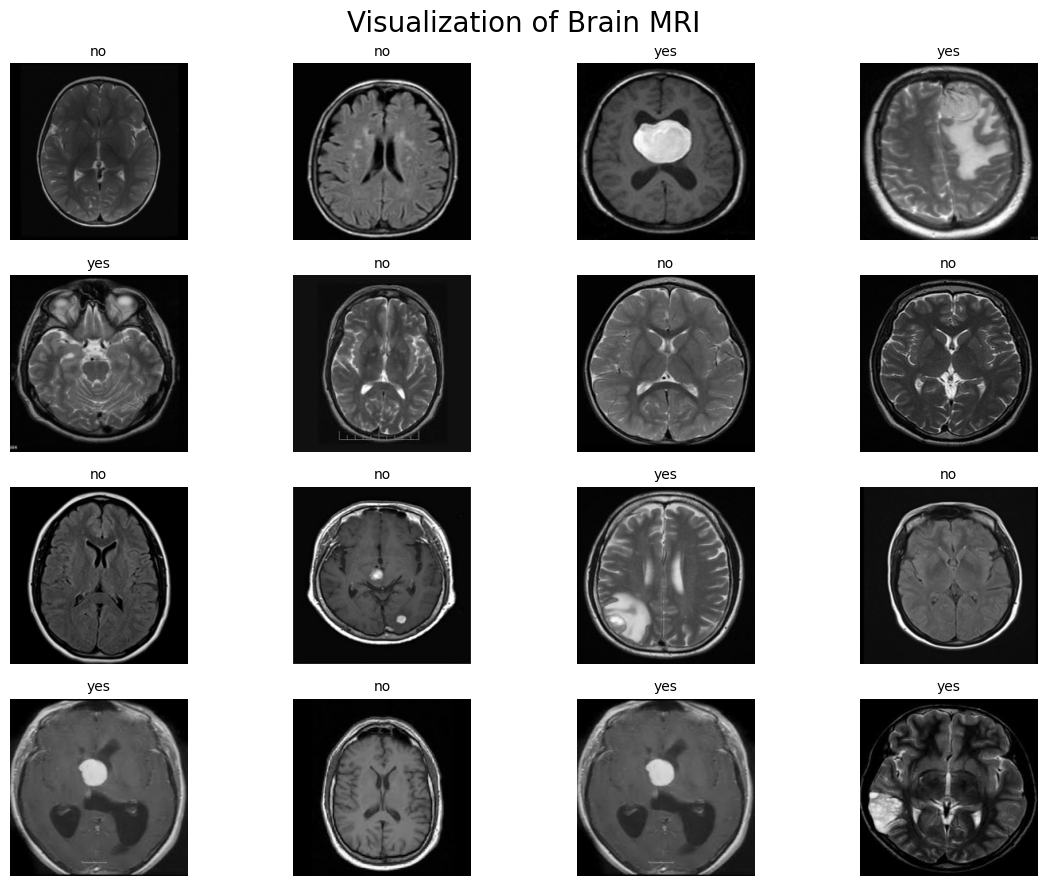

In [ ]:
import matplotlib.pyplot as plt
import torch

fig = plt.figure(figsize=(12, 9))  # Fix typo here
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(dataset), size=(1,)).item()
    img, label = dataset[random_idx]

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img.permute(1, 2, 0))
    ax.set_title(class_names[label], fontsize=10)
    ax.axis('off')

plt.suptitle("Visualization of Brain MRI", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Leave space for the suptitle
plt.show()

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

def load_dataset_from_directory(directory):
    image_paths = []
    labels = []

    class_names = ['no', 'yes']
    class_to_idx = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            if img_path.endswith(('.png', '.jpg', 'JPG', '.jpeg')):  # Let's filter image file extensions
                image_paths.append(img_path)
                labels.append(class_to_idx[class_name])

    return image_paths, labels

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

image_paths, labels = load_dataset_from_directory(dataset_path)
dataset = CustomDataset(image_paths, labels, transform)

# Train-validation and dataset split
train_size = int(0.7 * len(dataset))  # %80 Train
val_test_size = len(dataset) - train_size  # %20 Validation-Test
train_dataset, val_test_dataset = random_split(dataset, [train_size, val_test_size])

val_size = int(0.6 * len(val_test_dataset)) # Val
test_size = len(val_test_dataset) - val_size # Test
val_dataset, test_dataset = random_split(val_test_dataset, [val_size, test_size])

# Load dataset with Dataloader with batch size
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

In [ ]:
# Show image paths and labels (Optional — comment this if it's too long)
for i in range(len(image_paths)):
    print(image_paths[i], "\t", labels[i])

# Dataset sizes
print(f"\n✅ Dataset Sizes:")
print(f"Total samples       : {len(dataset)}")
print(f"Training samples    : {len(train_dataset)}")
print(f"Validation samples  : {len(val_dataset)}")
print(f"Test samples        : {len(test_dataset)}")

# Device setup for Google Colab (1 GPU)
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"\n🚀 Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("\n⚠️ GPU not found. Using CPU.")

/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/34 no.jpg 	 0
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/N20.JPG 	 0
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/N1.JPG 	 0
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/49 no.jpg 	 0
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/N15.jpg 	 0
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/No18.jpg 	 0
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/31 no.jpg 	 0
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/no 6.jpg 	 0
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/3 no.jpg 	 0
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/no 5.jpeg 	 0
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_d

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split


In [ ]:
class BrainTumorDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label


In [ ]:
data_dir = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset'
yes_dir = os.path.join(data_dir, 'yes')
no_dir = os.path.join(data_dir, 'no')

image_paths = []
labels = []

for folder, label in [(yes_dir, 1), (no_dir, 0)]:
    for filename in os.listdir(folder):
        if filename.endswith(('jpg', 'jpeg', 'png', 'JPG')):
            image_paths.append(os.path.join(folder, filename))
            labels.append(label)

In [ ]:
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels)

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

In [ ]:
train_dataset = BrainTumorDataset(train_paths, train_labels, transform=transform)
val_dataset = BrainTumorDataset(val_paths, val_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
epochs = 5

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/5, Loss: 0.5006
Epoch 2/5, Loss: 0.0756
Epoch 3/5, Loss: 0.0289
Epoch 4/5, Loss: 0.0167
Epoch 5/5, Loss: 0.0047


eval

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total:.2f}%")


Validation Accuracy: 90.20%


In [ ]:
print("Sample training image path:", train_paths[0])
print("Sample validation image path:", val_paths[0])


Sample training image path: /kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/31 no.jpg
Sample validation image path: /kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/32 no.jpg


In [ ]:
import os
import shutil

def copy_images(image_paths, labels, target_root):
    for img_path, label in zip(image_paths, labels):
        class_name = 'yes' if label == 1 else 'no'
        dest_dir = os.path.join(target_root, class_name)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(img_path, os.path.join(dest_dir, os.path.basename(img_path)))

# Create the folder structure
copy_images(train_paths, train_labels, 'train_dataset')
copy_images(val_paths, val_labels, 'val_dataset')

In [ ]:
from torchvision import datasets, transforms

# Example: Data transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load dataset
train_dataset = datasets.ImageFolder(root='train_dataset', transform=transform)
val_dataset = datasets.ImageFolder(root='val_dataset', transform=transform)

# Create loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

# Get class names
class_names = train_dataset.classes  # <-- This is what you need
num_classes = len(class_names)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Setup
num_classes = len(class_names)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained ResNet152 and modify final layer
resnet152_model = models.resnet152(pretrained=True)
resnet152_model.fc = nn.Linear(resnet152_model.fc.in_features, num_classes)
resnet152_model = resnet152_model.to(device)

# Training function
def train(model, train_loader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0
    for batch_inputs, batch_labels in train_loader:
        batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)
        optimizer.zero_grad()
        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()
    average_loss = total_loss / len(train_loader)
    accuracy = correct / total * 100
    return average_loss, accuracy

# Validation function
def validate(model, val_loader, criterion):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_inputs, batch_labels in val_loader:
            batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)
            outputs = model(batch_inputs)
            loss = criterion(outputs, batch_labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += batch_labels.size(0)
            correct += (predicted == batch_labels).sum().item()
    average_loss = total_loss / len(val_loader)
    accuracy = correct / total * 100
    return accuracy, average_loss

# Define loss and optimizer
class_weights = torch.tensor([1.2949, 0.8145], dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(resnet152_model.parameters(), lr=1e-4, weight_decay=1e-3)

# Optional: Add learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Optional: Early stopping setup
best_val_acc = 0.0
patience = 5
early_stop_counter = 0

# Training loop
num_epochs = 25
for epoch in range(num_epochs):
    train_loss, train_accuracy = train(resnet152_model, train_loader, criterion, optimizer)
    val_accuracy, val_loss = validate(resnet152_model, val_loader, criterion)

    print(f'Epoch [{epoch + 1}/{num_epochs}] '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')

    scheduler.step()  # Update LR if scheduler is used

    # Early stopping check
    if val_accuracy >= best_val_acc:
        best_val_acc = val_accuracy
        early_stop_counter = 0
        torch.save(resnet152_model.state_dict(), "resnet_model_best.pth")  # Save best model
    else:
        early_stop_counter += 1
        print(f"No improvement. Early stop counter: {early_stop_counter}/{patience}")
        if early_stop_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            break

print("Training complete.")

# Final model save (full model if needed)
torch.save(resnet152_model.state_dict(), "resnet_model_final.pth")

Epoch [1/25] Train Loss: 0.4600, Train Acc: 76.24%, Val Loss: 0.2830, Val Acc: 92.16%
Epoch [2/25] Train Loss: 0.0714, Train Acc: 99.01%, Val Loss: 0.2437, Val Acc: 94.12%
Epoch [3/25] Train Loss: 0.0125, Train Acc: 100.00%, Val Loss: 0.2362, Val Acc: 96.08%
Epoch [4/25] Train Loss: 0.0026, Train Acc: 100.00%, Val Loss: 0.2494, Val Acc: 96.08%
Epoch [5/25] Train Loss: 0.0017, Train Acc: 100.00%, Val Loss: 0.2669, Val Acc: 96.08%
Epoch [6/25] Train Loss: 0.0017, Train Acc: 100.00%, Val Loss: 0.3304, Val Acc: 92.16%
No improvement. Early stop counter: 1/5
Epoch [7/25] Train Loss: 0.0007, Train Acc: 100.00%, Val Loss: 0.3921, Val Acc: 90.20%
No improvement. Early stop counter: 2/5
Epoch [8/25] Train Loss: 0.0005, Train Acc: 100.00%, Val Loss: 0.3384, Val Acc: 90.20%
No improvement. Early stop counter: 3/5
Epoch [9/25] Train Loss: 0.0008, Train Acc: 100.00%, Val Loss: 0.3497, Val Acc: 90.20%
No improvement. Early stop counter: 4/5
Epoch [10/25] Train Loss: 0.0004, Train Acc: 100.00%, Val L

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

resnet152_model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = resnet152_model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
report = classification_report(all_labels, all_preds, target_names=class_names, digits=4)

print(f"Test Accuracy: {accuracy * 100:.2f}%\n")
print("Detailed Classification Report:\n")
print(report)


Test Accuracy: 88.24%

Detailed Classification Report:

              precision    recall  f1-score   support

          no     0.9375    0.7500    0.8333        20
         yes     0.8571    0.9677    0.9091        31

    accuracy                         0.8824        51
   macro avg     0.8973    0.8589    0.8712        51
weighted avg     0.8887    0.8824    0.8794        51



In [ ]:
from collections import Counter
print("Training label distribution:", Counter(train_labels))
print("Validation label distribution:", Counter(val_labels))

Training label distribution: Counter({1: 124, 0: 78})
Validation label distribution: Counter({1: 31, 0: 20})


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)

weights = torch.tensor(class_weights, dtype=torch.float).to(device)
print("Class weights:", weights)


Class weights: tensor([1.2949, 0.8145])
